In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qda

# Import the dataset
zone1 = np.array((1.19,1.16,0.91,1.05,1,0.94,1.09,1.01,1,1.07,1.12,1.09,1.21,1.23,1.09))
zone2 = np.array((0.96,1,1.11,1.15,0.97,0.93,0.85,0.98,1.16,0.94,1.12,1.2,1.25,1.1,1.23))
zone3 = np.array((0.81,0.91,0.87,0.75,0.83,0.86,1.02,0.69,0.73,0.95,0.66,0.63,0.9,0.69,0.8))
zone4 = np.array((0.64,0.65,0.88,0.61,0.75,0.86,0.71,0.72,0.72,0.87,0.66,0.78,0.80,0.74,0.83))
df = pd.DataFrame({
    'zone1': zone1,
    'zone2': zone2,
    'zone3': zone3,
    'zone4': zone4
})# Inspect the dataset
df.head()

,zone1,zone2,zone3,zone4
0,1.19,0.96,0.81,0.64
1,1.16,1.00,0.91,0.65
2,0.91,1.11,0.87,0.88
3,1.05,1.15,0.75,0.61
4,1.00,0.97,0.83,0.75


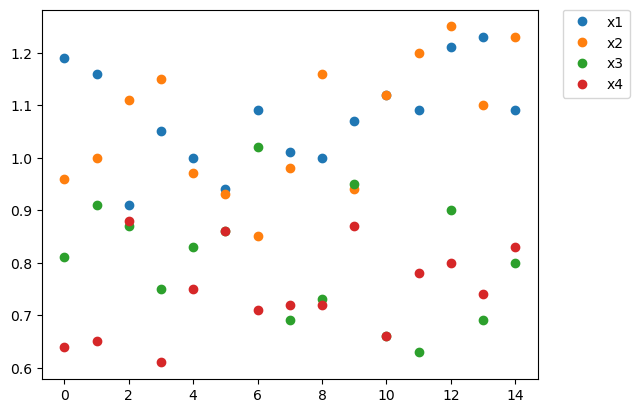

In [2]:
plt.plot(df['zone1'], linestyle='none', marker='o', label = 'x1')
plt.plot(df['zone2'], linestyle='none', marker='o', label = 'x2')
plt.plot(df['zone3'], linestyle='none', marker='o', label = 'x3')
plt.plot(df['zone4'], linestyle='none', marker='o', label = 'x4')
# place the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [32]:
# Transpose the dataset and stack the columns
data_stack = df.transpose().melt()

# Remove unnecessary columns
data_stack = data_stack.drop('variable', axis=1)

data_stack.head()


,value
0,1.19
1,0.96
2,0.81
3,0.64
4,1.16


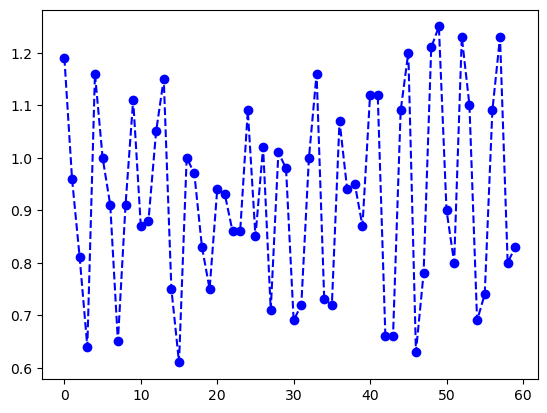

In [33]:
# Plot the data first
plt.plot(data_stack['value'], color='b', linestyle='--', marker='o')
plt.show()

Shapiro-Wilk test p-value = 0.064


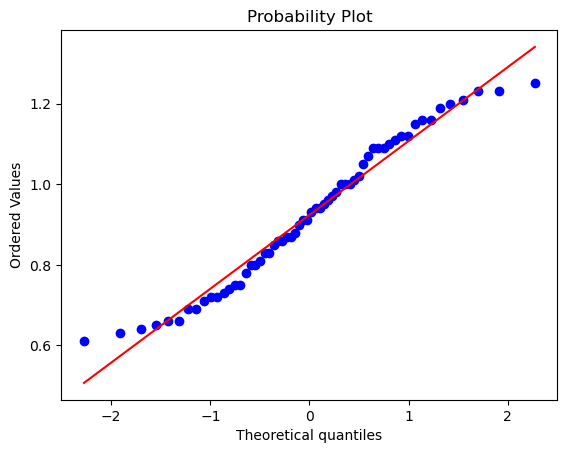

In [34]:
# Perform the Shapiro-Wilk test
_, pval_SW = stats.shapiro(data_stack['value'])
print('Shapiro-Wilk test p-value = %.3f' % pval_SW)

# Plot the qqplot
stats.probplot(data_stack['value'], dist="norm", plot=plt)
plt.show()

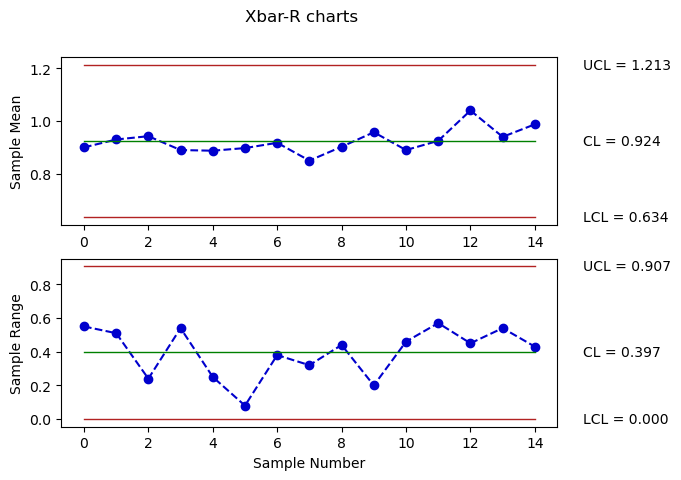

In [36]:
# X-bar and R charts
data_XR = qda.ControlCharts.XbarR(df)

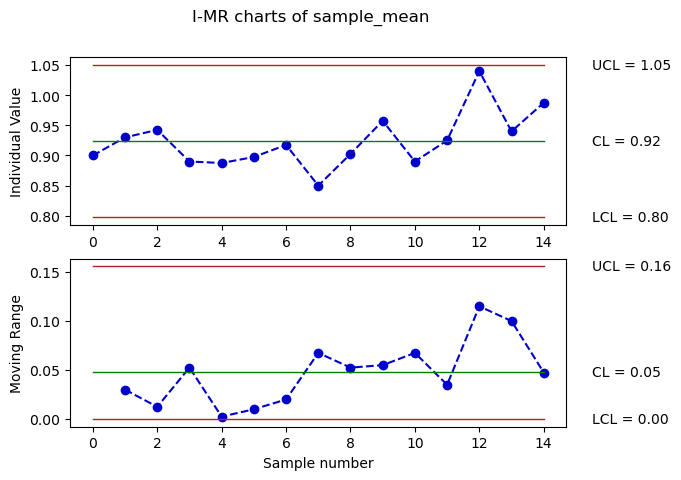

In [37]:
# Create a new dataframe that stores the mean of all the samples
data_Xbar = pd.DataFrame(data_XR['sample_mean'])

# Build the IMR chart using this new dataframe
data_Xbar = qda.ControlCharts.IMR(data_Xbar, 'sample_mean')


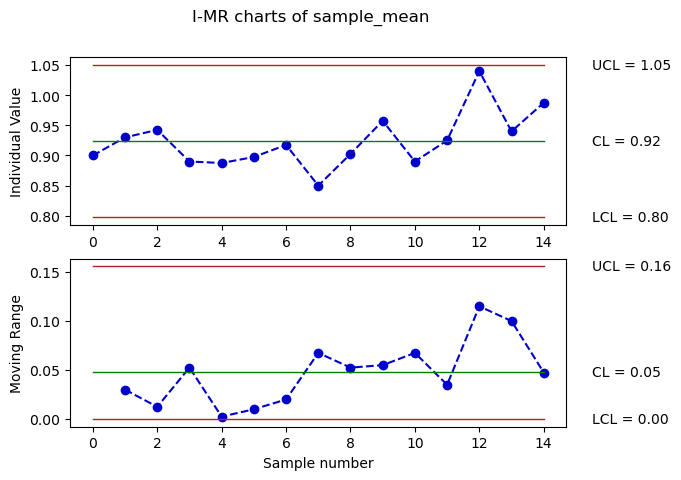

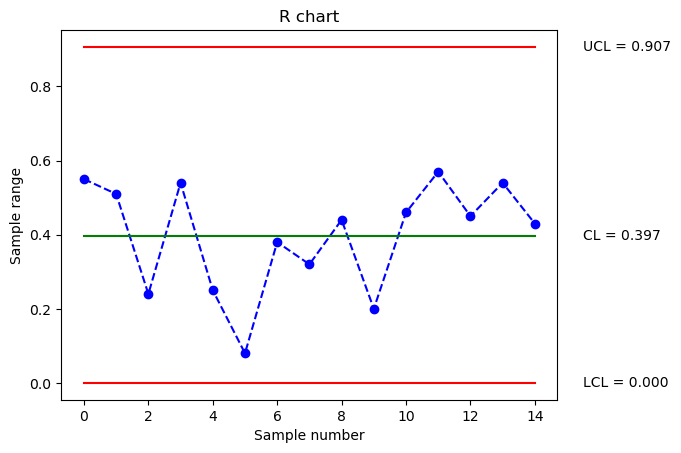

In [38]:
# Design a I-MR-R control chart

# Build the IMR chart using this new dataframe
data_Xbar = qda.ControlCharts.IMR(data_Xbar, 'sample_mean')

# Plot the R chart as well
plt.title('R chart')
plt.plot(data_XR['sample_range'], color='b', linestyle='--', marker='o')
plt.plot(data_XR['R_UCL'], color='r')
plt.plot(data_XR['R_CL'], color='g')
plt.plot(data_XR['R_LCL'], color='r')
plt.ylabel('Sample range')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(data_XR)+.5, data_XR['R_UCL'].iloc[0], 'UCL = {:.3f}'.format(data_XR['R_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XR)+.5, data_XR['R_CL'].iloc[0], 'CL = {:.3f}'.format(data_XR['R_CL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XR)+.5, data_XR['R_LCL'].iloc[0], 'LCL = {:.3f}'.format(data_XR['R_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(data_XR['R_TEST1'], linestyle='none', marker='s', color='r', markersize=10)
plt.show()


> ## Point 2

In [41]:
data_stack['zone1']=np.tile(np.array([1, 0, 0,0]), int(len(data_stack)/4))
data_stack['zone2']=np.tile(np.array([0, 1, 0,0]), int(len(data_stack)/4))
data_stack['zone3']=np.tile(np.array([0, 0, 1,0]), int(len(data_stack)/4))
data_stack['zone4']=np.tile(np.array([0, 0, 0,1]), int(len(data_stack)/4))


In [42]:
X = data_stack[['zone1','zone2', 'zone3','zone4']]
y = data_stack['value']

In [43]:
import qda
stepwise = qda.StepwiseRegression(add_constant = True, direction = 'both', alpha_to_enter = 0.15, alpha_to_remove = 0.15)

# Fit the model
model = stepwise.fit(y, X)

Stepwise Regression

######################################
### Step 1
-------------------
Forward Selection

COEFFICIENTS
------------
 Term      Coef      P-Value
const  0.982444 5.007457e-46
zone4 -0.234444 2.698057e-06

MODEL SUMMARY
-------------
       S     R-sq  R-sq(adj)
0.151183 0.318077    0.30632

######################################
### Step 2
-------------------
Forward Selection

COEFFICIENTS
------------
 Term      Coef      P-Value
const  1.070333 2.045529e-51
zone4 -0.322333 1.168841e-13
zone3 -0.263667 9.053817e-11

MODEL SUMMARY
-------------
       S     R-sq  R-sq(adj)
0.105171 0.675687   0.664308
-------------------
Backward Elimination

No predictor removed.

######################################
### Step 3
-------------------
Forward Selection

No predictor added. Exiting stepwise.
-------------------


In [44]:
results = model.model_fit
qda.summary(results)

REGRESSION EQUATION
-------------------
value =  + 1.070 const -0.322 zone4 -0.264 zone3

COEFFICIENTS
------------
 Term    Coef  SE Coef  T-Value    P-Value
const  1.0703   0.0192  55.7423 2.0455e-51
zone4 -0.3223   0.0333  -9.6919 1.1688e-13
zone3 -0.2637   0.0333  -7.9279 9.0538e-11

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
0.1052 0.6757     0.6643

ANALYSIS OF VARIANCE
---------------------
    Source   DF  Adj SS  Adj MS   F-Value    P-Value
Regression  2.0  1.3135  0.6568   59.3781 1.1547e-14
     const  1.0 34.3684 34.3684 3107.2041 2.0455e-51
     zone4  1.0  1.0390  1.0390   93.9336 1.1688e-13
     zone3  1.0  0.6952  0.6952   62.8523 9.0538e-11
     Error 57.0  0.6305  0.0111       NaN        NaN
     Total 59.0  1.9440     NaN       NaN        NaN


Shapiro-Wilk test p-value = 0.378


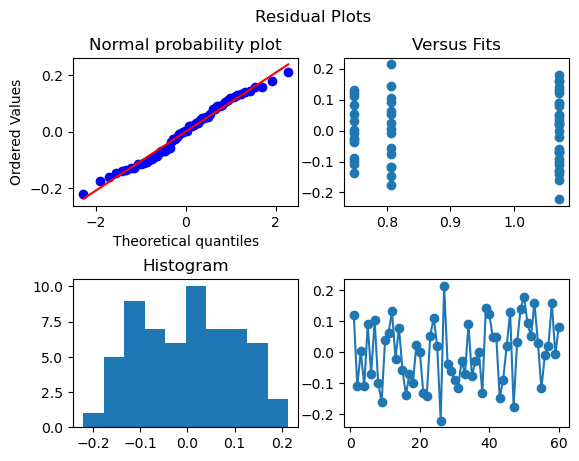

In [45]:
#Check on residuals
residuals = results.resid
fits = results.fittedvalues
# Perform the Shapiro-Wilk test
_, pval_SW = stats.shapiro(residuals)
print('Shapiro-Wilk test p-value = %.3f' % pval_SW)

# Plot the residuals
fig, axs = plt.subplots(2, 2)
fig.suptitle('Residual Plots')
stats.probplot(residuals, dist="norm", plot=axs[0,0])
axs[0,0].set_title('Normal probability plot')
axs[0,1].scatter(fits, residuals)
axs[0,1].set_title('Versus Fits')
fig.subplots_adjust(hspace=0.5)
axs[1,0].hist(residuals)
axs[1,0].set_title('Histogram')
axs[1,1].plot(np.arange(1, len(residuals)+1), residuals, 'o-')
plt.show()

Runs test p-value on the residuals = 0.608


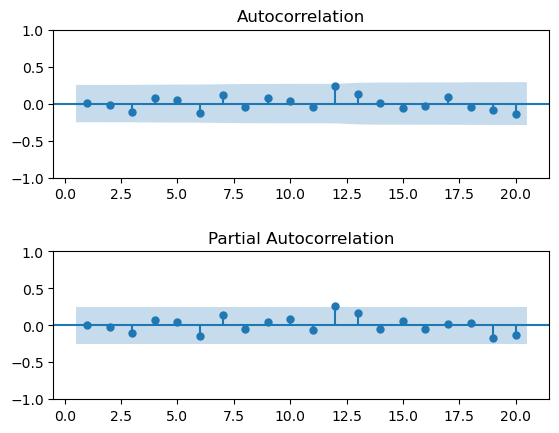

In [48]:
#RANDOMNESS OF FESIDUALS
from statsmodels.sandbox.stats.runs import runstest_1samp

_, pval_runs_res = runstest_1samp(residuals, correction=False)
print('Runs test p-value on the residuals = {:.3f}'.format(pval_runs_res))

import statsmodels.graphics.tsaplots as sgt

fig, ax = plt.subplots(2, 1)
sgt.plot_acf(residuals, lags = int(len(data_stack)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(residuals, lags = int(len(data_stack)/3), zero=False, ax=ax[1], 
            method = 'ywm')
plt.show()

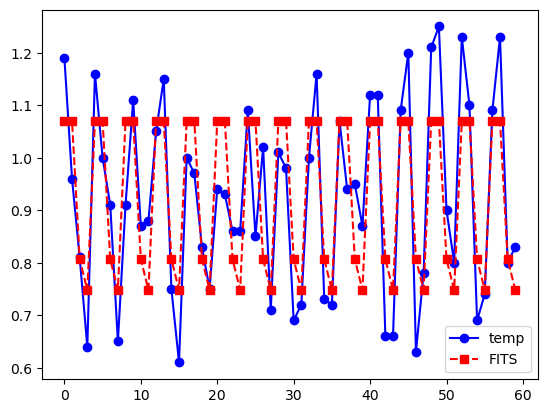

In [51]:
plt.plot(data_stack['value'], color='b', linestyle='-', marker='o', label='temp')
plt.plot(results.fittedvalues, color='r', linestyle='--', marker='s', label='FITS')
plt.legend()
plt.show()

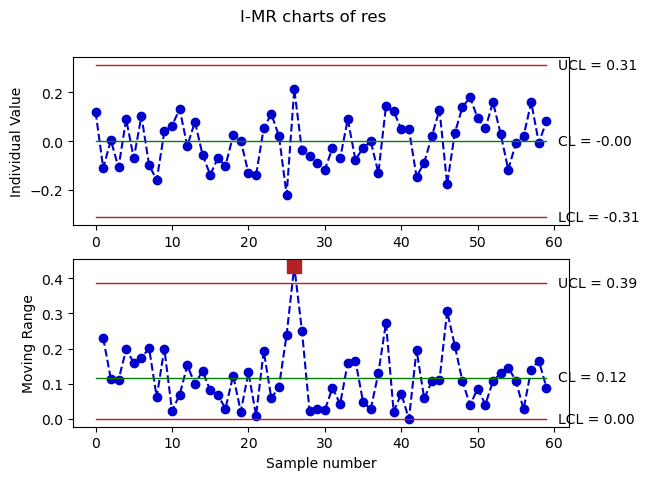

In [49]:
# Put the residuals in a dataframe
df_SCC = pd.DataFrame(results.resid, columns=['res'])

# Plot the IMR control chart
df_SCC_IMR = qda.ControlCharts.IMR(df_SCC, 'res')

> Xbar_R control chart on residual

In [56]:
data_transform=results.resid

data_BC_unstack = data_transform.to_numpy().reshape(df.shape)
# and convert it to a DataFrame
data_BC_unstack = pd.DataFrame(data_BC_unstack, columns=df.columns)

# Print out the transformed data
data_BC_unstack.head()

,zone1,zone2,zone3,zone4
0,0.1197,-0.1103,0.0033,-0.108
1,0.0897,-0.0703,0.1033,-0.098
2,-0.1603,0.0397,0.0633,0.132
3,-0.0203,0.0797,-0.0567,-0.138
4,-0.0703,-0.1003,0.0233,0.002


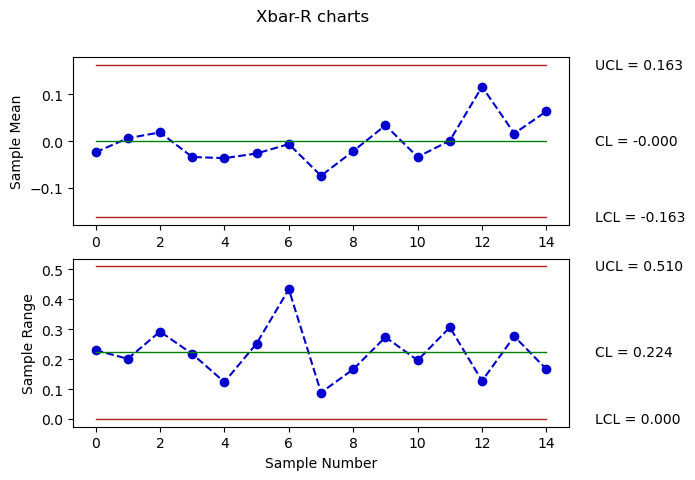

In [57]:
# X-bar and R charts
data_XR_resid = qda.ControlCharts.XbarR(data_BC_unstack)